# Week 3 -- Analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [30]:
no_games = 3

## Functions

In [31]:
def per_week_stats(dataframe, column1, column2):
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [81]:
def print_metric(dataframe, metric, player_inx):
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][[player_inx]]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))

In [ ]:
average = round(runningbacks['AvgAtt_pGame'].mean(), 2)
chris = round(runningbacks['AvgAtt_pGame'][13], 2)
derrick = round(runningbacks['AvgAtt_pGame'][69], 2)
mark = round(runningbacks['AvgAtt_pGame'][106], 2)
dandre = round(runningbacks['AvgAtt_pGame'][110], 2)

metric = 'Att/Game'

print('Avg ' + metric + ':' + str(average))
print('Carson' + metric + ':' + str(chris))
print('Henry ' + metric + ':' + str(derrick))
print('Ingram ' + metric + ':' + str(mark))
print('Swift ' + metric + ':' + str(dandre))

In [ ]:
average = quarterbacks['YdspGame'].mean()
dak = quarterbacks['YdspGame'][11]
aaron = quarterbacks['YdspGame'][31]

x = ['Avg QB', 'Prescott', 'Rodgers']
y = average, dak, aaron

plt.figure(figsize = (10,6))

plt.bar(x, y)

plt.title('Average Yards/Game')
plt.xlabel('Quarterback')
plt.ylabel('Yards')
plt.show;

## Read in DataFrames

In [38]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')

In [39]:
print(offense.shape)
offense.head()

(461, 32)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3
0,Alvin Kamara,NOR,RB,25,3,2,0,0,0,0,0,31,153,13.40,3,31,27,285,15.60,3,0,0,6,0,0,93.30,1,1,79.80,18.70,29.40,31.70
1,Russell Wilson,SEA,QB,32,3,3,79,103,925,14,1,14,90,10.30,0,0,0,0,0.00,0,1,0,0,0,1,103.00,1,2,103.00,31.80,34.40,36.80
2,Aaron Jones,GNB,RB,26,3,3,0,0,0,0,0,50,303,6.60,4,18,10,95,14.00,1,1,0,5,0,0,74.80,2,3,69.80,13.60,41.60,14.60
3,Calvin Ridley,ATL,WR,26,3,3,0,0,0,0,0,2,6,3.00,0,35,21,349,22.20,4,0,0,4,0,0,70.00,1,4,59.50,24.90,22.90,11.70
4,Josh Allen,BUF,QB,24,3,3,81,114,1038,10,1,22,84,11.20,2,0,0,0,0.00,0,3,3,2,0,0,94.90,2,5,94.90,28.20,34.50,32.20


In [40]:
print(defense.shape)
defense.head()

(32, 26)


,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3
0,Indianapolis Colts,46,154,4.40,676,70,280,4.00,1,75,6.10,47,9.70,454,4,6,4,66.70,6,6,0,9,45.00,4.00,15.00,26.00
1,San Francisco 49ers,48,189,4.80,912,80,350,4.40,2,104,5.70,64,9.20,588,2,4,2,50.00,4,2,2,5,21.00,4.00,5.00,12.00
2,Baltimore Ravens,59,125,4.90,610,44,189,4.30,0,75,6.20,46,10.10,464,2,3,2,66.70,5,2,3,6,31.00,15.00,15.00,1.00
3,Los Angeles Chargers,59,188,5.40,1011,71,328,4.60,1,111,6.60,72,10.10,730,3,9,2,22.20,2,1,1,6,14.00,11.00,1.00,2.00
4,Pittsburgh Steelers,60,183,4.80,870,61,162,2.70,1,107,7.70,64,12.80,819,6,9,4,44.40,5,4,1,15,28.00,8.00,13.00,7.00


## QB Analysis

In [62]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3
1,Russell Wilson,SEA,QB,32,3,3,79,103,925,14,1,14,90,10.30,0,0,0,0,0.00,0,1,0,0,0,1,103.00,1,2,103.00,31.80,34.40,36.80
4,Josh Allen,BUF,QB,24,3,3,81,114,1038,10,1,22,84,11.20,2,0,0,0,0.00,0,3,3,2,0,0,94.90,2,5,94.90,28.20,34.50,32.20
6,Patrick Mahomes,KAN,QB,25,3,3,82,121,898,9,0,10,80,8.00,1,0,0,0,0.00,0,0,0,1,0,1,87.90,3,7,87.90,20.40,27.50,40.00
8,Dak Prescott,DAL,QB,27,3,3,96,143,1188,5,2,14,74,7.90,3,0,0,0,0.00,0,2,2,3,0,0,86.90,4,9,86.90,17.60,39.80,29.50
13,Kyler Murray,ARI,QB,23,3,3,75,113,786,4,5,26,187,8.90,4,0,0,0,0.00,0,0,0,4,0,0,85.10,5,14,85.10,27.30,33.10,24.70


In [67]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [73]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,RushingYds_pG,TTL_pG
1,Russell Wilson,SEA,QB,32,3,3,79,103,925,14,1,14,90,10.30,0,0,0,0,0.00,0,1,0,0,0,1,103.00,1,2,103.00,31.80,34.40,36.80,26.33,34.33,0.77,308.33,4.67,30.00,34.33
4,Josh Allen,BUF,QB,24,3,3,81,114,1038,10,1,22,84,11.20,2,0,0,0,0.00,0,3,3,2,0,0,94.90,2,5,94.90,28.20,34.50,32.20,27.00,38.00,0.71,346.00,3.33,28.00,31.63
6,Patrick Mahomes,KAN,QB,25,3,3,82,121,898,9,0,10,80,8.00,1,0,0,0,0.00,0,0,0,1,0,1,87.90,3,7,87.90,20.40,27.50,40.00,27.33,40.33,0.68,299.33,3.00,26.67,29.30
8,Dak Prescott,DAL,QB,27,3,3,96,143,1188,5,2,14,74,7.90,3,0,0,0,0.00,0,2,2,3,0,0,86.90,4,9,86.90,17.60,39.80,29.50,32.00,47.67,0.67,396.00,1.67,24.67,28.97
13,Kyler Murray,ARI,QB,23,3,3,75,113,786,4,5,26,187,8.90,4,0,0,0,0.00,0,0,0,4,0,0,85.10,5,14,85.10,27.30,33.10,24.70,25.00,37.67,0.66,262.00,1.33,62.33,28.37


In [69]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,RushingYds_pG,TTL_pG
count,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,43.00,40.00,43.00,43.00,43.00,43.00
mean,28.81,2.63,2.28,52.35,78.86,586.44,4.00,1.67,9.26,40.93,6.54,0.51,0.12,0.12,0.21,0.14,0.00,1.14,0.49,0.51,0.02,0.19,44.48,44.43,14.49,15.19,14.76,18.67,28.33,0.65,210.02,1.42,13.96,15.76
std,5.48,0.66,1.16,29.41,43.26,328.71,3.09,1.66,7.72,47.21,4.18,1.03,0.39,0.39,2.48,2.07,0.00,1.26,0.83,1.03,0.15,0.39,28.12,28.14,9.93,11.82,10.65,9.25,13.65,0.15,104.25,1.05,15.66,8.96
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3.00,-1.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,-3.00,0.00
25%,24.50,2.00,2.00,33.00,48.00,402.00,2.00,0.00,5.00,6.50,3.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.30,25.20,6.30,1.55,9.40,16.25,25.83,0.60,188.00,0.67,2.75,11.75
50%,28.00,3.00,3.00,63.00,95.00,699.00,4.00,1.00,7.00,27.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,50.70,50.70,16.80,15.50,14.30,21.33,32.00,0.67,238.00,1.50,9.00,17.63
75%,32.00,3.00,3.00,73.50,106.50,801.50,6.00,3.00,12.00,66.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,59.95,59.90,21.95,24.15,22.45,24.83,36.00,0.70,270.00,2.00,22.00,19.97
max,43.00,3.00,3.00,96.00,143.00,1188.00,14.00,6.00,35.00,187.00,18.80,4.00,2.00,2.00,15.00,12.00,0.00,4.00,3.00,4.00,1.00,1.00,103.00,103.00,31.80,39.80,40.00,32.00,47.67,1.00,396.00,4.67,62.33,34.33


In [70]:
quarterbacks[quarterbacks['Player'].isin(['Dak Prescott', 'Aaron Rodgers'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,RushingYds_pG,TTL_pG
8,Dak Prescott,DAL,QB,27,3,3,96,143,1188,5,2,14,74,7.90,3,0,0,0,0.00,0,2,2,3,0,0,86.90,4,9,86.90,17.60,39.80,29.50,32.00,47.67,0.67,396.00,1.67,24.67,28.97
22,Aaron Rodgers,GNB,QB,37,3,3,71,106,887,9,0,5,26,7.00,0,1,1,-6,-6.00,0,0,0,0,0,0,74.00,6,23,73.50,30.80,18.20,24.50,23.67,35.33,0.67,295.67,3.00,8.67,24.50


In [82]:
print_metric(quarterbacks, 'PassingYds_pG', 8)

Avg PassingYds_pG: 210.02
8    Dak Prescott PassingYds_pG: 396.0
Name: Player, dtype: object


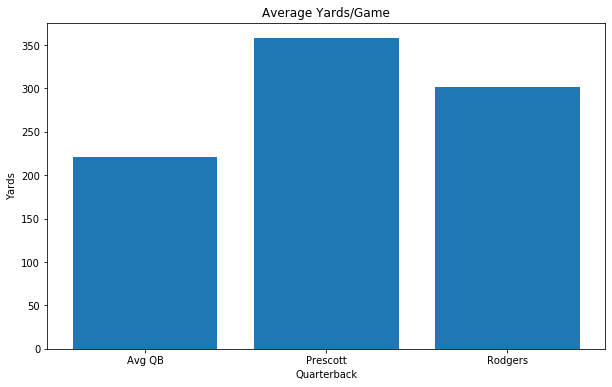

In [35]:
average = quarterbacks['YdspGame'].mean()
dak = quarterbacks['YdspGame'][11]
aaron = quarterbacks['YdspGame'][31]

x = ['Avg QB', 'Prescott', 'Rodgers']
y = average, dak, aaron

plt.figure(figsize = (10,6))

plt.bar(x, y)

plt.title('Average Yards/Game')
plt.xlabel('Quarterback')
plt.ylabel('Yards')
plt.show;

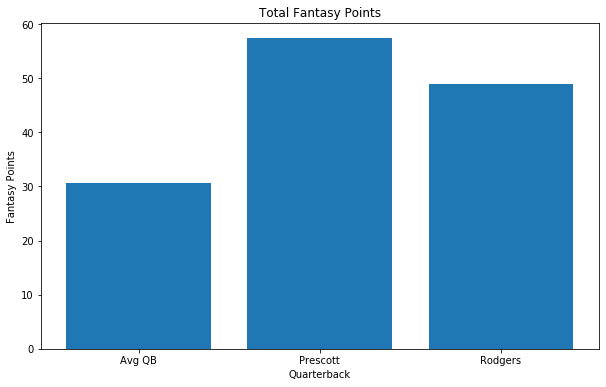

In [36]:
average = quarterbacks['Ttl_Fant'].mean()
dak = quarterbacks['Ttl_Fant'][11]
aaron = quarterbacks['Ttl_Fant'][31]

x = ['Avg QB', 'Prescott', 'Rodgers']
y = average, dak, aaron

plt.figure(figsize = (10,6))

plt.bar(x, y)

plt.title('Total Fantasy Points')
plt.xlabel('Quarterback')
plt.ylabel('Fantasy Points')
plt.show;

In Week 3, Dallas will be playing Seattle where Green Bay will go up against the New Orleans Saints. Both are formidable opponents so I want to hedege my bets on the defense that has allowed more passing yards & yards per passing play.

In [30]:
defense[defense['TEAM'].isin(['Seattle Seahawks', 'New Orleans Saints'])]

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
19,Seattle Seahawks,65,147,6.60,970,46,139,3.00,3,98,8.60,67,12.60,847,3,9,6,66.70,3,2,1,3,9.00,6.00,3.00,32.50,485.00,69.50,423.50
21,New Orleans Saints,66,141,4.90,685,61,202,3.30,2,74,7.00,51,10.20,521,5,7,6,85.70,4,2,2,6,19.00,15.00,4.00,33.00,342.50,101.00,260.50


This one is a no brainer - Seattle has allowed on average 424 passing yards so far this season where the Saints are only letting 261 yards per game.

## Runningbacks

In [37]:
runningbacks = df[df['Position'] == 'RB']

In [39]:
runningbacks['AvgAtt_pGame'] = runningbacks['RushingAttempts']/runningbacks['Games']
runningbacks['AvgYds_pGame'] = runningbacks['RushingYds']/runningbacks['Games']
runningbacks['Targets_pGame'] = runningbacks['Targeted']/runningbacks['Games']
runningbacks['Receptions_pGame'] = runningbacks['Receptions']/runningbacks['Games']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [46]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,AvgAtt_pGame,AvgYds_pGame,Targets_pGame,Receptions_pGame
0,Aaron Jones,GNB,RB,26,2,2,0,0,0,0,0,34,234,14.80,3,14,8,78,16.50,1,1,0,4,0,0,59.20,1,1,55.20,13.60,41.60,17.00,117.00,7.00,4.00
2,Alvin Kamara,NOR,RB,25,2,2,0,0,0,0,0,25,95,11.00,3,17,14,146,14.30,1,0,0,4,0,0,55.10,2,3,48.10,18.70,29.40,12.50,47.50,8.50,7.00
3,Christian McCaffrey,CAR,RB,24,2,2,0,0,0,0,0,41,156,11.00,4,9,7,67,14.70,0,0,0,4,0,0,49.80,3,4,46.20,25.40,20.80,20.50,78.00,4.50,3.50
5,Josh Jacobs,LVR,RB,22,2,2,0,0,0,0,0,52,181,7.80,3,9,7,63,9.00,0,0,0,3,0,0,45.90,4,6,42.40,31.90,10.50,26.00,90.50,4.50,3.50
7,Ezekiel Elliott,DAL,RB,25,2,2,0,0,0,0,0,44,185,6.00,2,11,9,64,8.10,1,2,1,3,0,0,45.40,5,8,40.90,24.70,16.20,22.00,92.50,5.50,4.50


In [45]:
runningbacks[runningbacks['Player'].isin(['Derrick Henry', 'Chris Carson', 'Mark Ingram', "D'Andre Swift"])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,AvgAtt_pGame,AvgYds_pGame,Targets_pGame,Receptions_pGame
13,Chris Carson,SEA,RB,26,2,2,0,0,0,0,0,23,93,4.40,0,9,9,81,9.00,3,0,0,3,0,0,39.90,8,14,35.40,18.60,16.80,11.50,46.50,4.50,4.50
69,Derrick Henry,TEN,RB,26,2,2,0,0,0,0,0,56,200,8.70,0,5,3,15,5.00,0,0,0,0,0,0,23.00,23,70,21.50,13.10,8.40,28.00,100.00,2.50,1.50
106,Mark Ingram,BAL,RB,31,2,2,0,0,0,0,0,19,84,8.20,1,3,2,22,11.00,0,0,0,1,0,0,17.60,31,,0.00,0.00,0.00,9.50,42.00,1.50,1.00
110,D'Andre Swift,DET,RB,21,2,0,0,0,0,0,0,8,20,7.00,1,10,8,75,12.80,0,0,0,1,0,0,19.50,33,,15.50,8.30,7.20,4.00,10.00,5.00,4.00


Avg Att/Game:7.02
CarsonAtt/Game:11.5
Henry Att/Game:28.0
Ingram Att/Game:9.5
Swift Att/Game:4.0


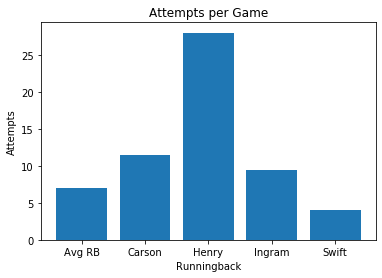

In [65]:


x = ['Avg RB', 'Carson', 'Henry', 'Ingram', 'Swift']
y = average, chris, derrick, mark, dandre

plt.figure()
    
plt.bar(x, y)

plt.title('Attempts per Game')
plt.xlabel('Runningback')
plt.ylabel('Attempts')
plt.show;

Avg Yds/Game:30.27
CarsonYds/Game:46.5
Henry Yds/Game:100.0
Ingram Yds/Game:42.0
Swift Yds/Game:10.0


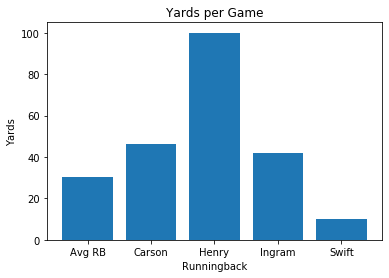

In [66]:
average = round(runningbacks['AvgYds_pGame'].mean(), 2)
chris = round(runningbacks['AvgYds_pGame'][13], 2)
derrick = round(runningbacks['AvgYds_pGame'][69], 2)
mark = round(runningbacks['AvgYds_pGame'][106], 2)
dandre = round(runningbacks['AvgYds_pGame'][110], 2)

metric = 'Yds/Game'

print('Avg ' + metric + ':' + str(average))
print('Carson' + metric + ':' + str(chris))
print('Henry ' + metric + ':' + str(derrick))
print('Ingram ' + metric + ':' + str(mark))
print('Swift ' + metric + ':' + str(dandre))

x = ['Avg RB', 'Carson', 'Henry', 'Ingram', 'Swift']
y = average, chris, derrick, mark, dandre

plt.figure()
    
plt.bar(x, y)

plt.title('Yards per Game')
plt.xlabel('Runningback')
plt.ylabel('Yards')
plt.show;

Avg Targets/Game: 2.08
Carson Targets/Game: 4.5
Henry Targets/Game: 2.5
Ingram Targets/Game: 1.5
Swift Targets/Game: 5.0


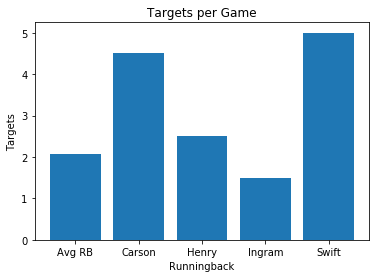

In [74]:
average = round(runningbacks['Targets_pGame'].mean(), 2)
chris = round(runningbacks['Targets_pGame'][13], 2)
derrick = round(runningbacks['Targets_pGame'][69], 2)
mark = round(runningbacks['Targets_pGame'][106], 2)
dandre = round(runningbacks['Targets_pGame'][110], 2)

metric = 'Targets/Game'

print('Avg ' + metric + ': ' + str(average))
print('Carson ' + metric + ': ' + str(chris))
print('Henry ' + metric + ': ' + str(derrick))
print('Ingram ' + metric + ': ' + str(mark))
print('Swift ' + metric + ': ' + str(dandre))

x = ['Avg RB', 'Carson', 'Henry', 'Ingram', 'Swift']
y = average, chris, derrick, mark, dandre

plt.figure()
    
plt.bar(x, y)

plt.title('Targets per Game')
plt.xlabel('Runningback')
plt.ylabel('Targets')
plt.show;

Avg Fantasy Pts: 13.75
Carson Fantasy Pts: 39.9
Henry Fantasy Pts: 23.0
Ingram Fantasy Pts: 17.6
Swift Fantasy Pts: 19.5


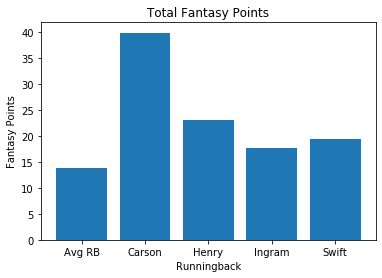

In [76]:
average = round(runningbacks['FDFantasyPts'].mean(), 2)
chris = round(runningbacks['FDFantasyPts'][13], 2)
derrick = round(runningbacks['FDFantasyPts'][69], 2)
mark = round(runningbacks['FDFantasyPts'][106], 2)
dandre = round(runningbacks['FDFantasyPts'][110], 2)

metric = 'Fantasy Pts'

print('Avg ' + metric + ': ' + str(average))
print('Carson ' + metric + ': ' + str(chris))
print('Henry ' + metric + ': ' + str(derrick))
print('Ingram ' + metric + ': ' + str(mark))
print('Swift ' + metric + ': ' + str(dandre))

x = ['Avg RB', 'Carson', 'Henry', 'Ingram', 'Swift']
y = average, chris, derrick, mark, dandre

plt.figure()

plt.bar(x, y)

plt.title('Total Fantasy Points')
plt.xlabel('Runningback')
plt.ylabel('Fantasy Points')
plt.show;

Off the bat, Carson has earned the most in fantasy points, but Henry has averaged 100 yds per game. They're my top 2 right now but how do they compare when I consider the defense they're going up against.

The matchups are as follows:

        Carson(SEA) --> DAL
        Henry(TEN) --> MIN
        Ingram(BAL) --> KC
        Swift(DET) --> ARI
        
Henry has attempted 28 carries on average so far this season. Minnesota has allowed 72 attempts in total and 309 yards. Henry averages 8.7 yards per carry where Minnesota has only allowed 4.3 from their competitors. As of right now, Henry is projected to bring in 17.43 pts. He's staying right where he is on my roster. Chris Carson has earned a fair amount when it comes to fantasy points. He doesn't amass a huge number of yards, but he doubles as a receiver, being targeted 9 times with 9 receptions. He'll face the Dallas Cowboys who have only allowed 266 yards on the ground. I'm a little nervous proceeding with him so I want to check two available RB stats and see how they compare to my current roster.

In [72]:
defense[defense['TEAM'].isin(['Dallas Cowboys', 'Minnesota Vikings', 'Kansas City Chiefs', 'Arizona Cardinals'])]

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
3,Arizona Cardinals,43,121,5.60,682,48,240,5.00,1,66,7.30,38,12.70,482,3,7,2,28.60,2,0,2,7,13.00,4.00,9.00,21.50,341.00,120.00,241.00
8,Kansas City Chiefs,48,137,6.10,839,66,301,4.60,3,65,8.70,42,13.40,564,2,6,5,83.30,2,2,0,6,12.00,7.00,5.00,24.00,419.50,150.50,282.00
22,Dallas Cowboys,67,144,5.60,802,74,266,3.60,2,68,8.10,44,12.50,548,4,9,4,44.40,1,1,0,2,1.00,4.00,-3.00,33.50,401.00,133.00,274.00
30,Minnesota Vikings,88,143,6.10,876,72,309,4.30,2,69,8.40,51,11.30,578,5,10,5,50.00,1,1,0,2,-1.00,-4.00,3.00,44.00,438.00,154.50,289.00


In [77]:
runningbacks[runningbacks['Player'].isin(['Malcolm Brown', 'Leonard Fournette'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,AvgAtt_pGame,AvgYds_pGame,Targets_pGame,Receptions_pGame
33,Malcolm Brown,LAR,RB,27,2,0,0,0,0,0,0,29,126,7.40,2,4,3,31,13.30,0,0,0,2,0,0,29.20,11,34,27.70,23.00,4.70,14.50,63.00,2.00,1.50
46,Leonard Fournette,TAM,RB,25,2,0,0,0,0,0,0,17,108,9.50,2,6,5,27,9.00,0,0,0,2,0,0,28.00,17,47,25.50,1.90,23.60,8.50,54.00,3.00,2.50


In [78]:
defense[defense['TEAM'].isin(['Buffalo Bills', 'Denver Broncos'])]

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
7,Denver Broncos,48,142,5.50,787,56,239,4.30,1,84,6.70,58,9.70,560,4,6,3,50.00,2,1,1,2,7.00,2.00,5.00,24.00,393.50,119.50,280.00
12,Buffalo Bills,52,125,5.30,664,37,151,4.10,2,82,6.60,52,10.40,543,3,7,4,57.10,2,1,1,6,10.00,8.00,2.00,26.00,332.00,75.50,271.50


So Malcolm Brown has attempted 29 rushes so far so he's definitely a part of the game, but he's going up again the Denver Broncos who have so far allowed 239 rushing yards and 1 rushing TD.

Fournette on the other hand has only rushed 17 times in the first 2 weeks and they're playing the Bills who have all but halted any rush attempts - sure they played the Jets Week 1, but they've still only allowed 151 rushing yards. I'm sticking with what I've got.

## Tight End

I'm dangerously light when it comes to tight ends. I need to make a good acquisition this week to build up my roster.

In [79]:
tight_ends = df[df['Position'] == 'TE']

In [81]:
tight_ends['Targets_pGame'] = tight_ends['Targeted']/tight_ends['Games']
tight_ends['Receptions_pGame'] = tight_ends['Receptions']/tight_ends['Games']
tight_ends['Yds_pGame'] = tight_ends['ReceivingYds']/tight_ends['Games']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [82]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,Targets_pGame,Receptions_pGame,Yds_pGame
14,Jonnu Smith,TEN,TE,25,2,2,0,0,0,0,0,0,0,0.00,0,12,8,120,15.00,3,0,0,3,0,0,34.00,1,15,30.00,9.60,20.40,6.00,4.00,60.00
18,Noah Fant,DEN,TE,23,2,2,0,0,0,0,0,0,0,0.00,0,11,9,138,18.30,2,0,0,2,1,0,32.30,2,19,27.80,14.10,13.70,5.50,4.50,69.00
19,Tyler Higbee,LAR,TE,27,2,2,0,0,0,0,0,0,0,0.00,0,9,8,94,18.50,3,0,0,3,0,0,31.40,3,20,27.40,4.00,23.40,4.50,4.00,47.00
25,Travis Kelce,KAN,TE,31,2,2,0,0,0,0,0,0,0,0.00,0,20,15,140,12.30,2,0,0,2,0,0,33.50,4,26,26.00,11.00,15.00,10.00,7.50,70.00
39,Mike Gesicki,MIA,TE,25,2,2,0,0,0,0,0,0,0,0.00,0,16,11,160,19.50,1,0,0,1,0,0,27.50,5,40,22.00,3.00,19.00,8.00,5.50,80.00


In [83]:
high_targets = tight_ends[tight_ends['Targeted'] > tight_ends['Targeted'].mean()*1.25]

In [88]:
high_targets[:3]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,Targets_pGame,Receptions_pGame,Yds_pGame
14,Jonnu Smith,TEN,TE,25,2,2,0,0,0,0,0,0,0,0.00,0,12,8,120,15.00,3,0,0,3,0,0,34.00,1,15,30.00,9.60,20.40,6.00,4.00,60.00
18,Noah Fant,DEN,TE,23,2,2,0,0,0,0,0,0,0,0.00,0,11,9,138,18.30,2,0,0,2,1,0,32.30,2,19,27.80,14.10,13.70,5.50,4.50,69.00
19,Tyler Higbee,LAR,TE,27,2,2,0,0,0,0,0,0,0,0.00,0,9,8,94,18.50,3,0,0,3,0,0,31.40,3,20,27.40,4.00,23.40,4.50,4.00,47.00


In [92]:
tight_ends

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,Targets_pGame,Receptions_pGame,Yds_pGame
14,Jonnu Smith,TEN,TE,25,2,2,0,0,0,0,0,0,0,0.00,0,12,8,120,15.00,3,0,0,3,0,0,34.00,1,15,30.00,9.60,20.40,6.00,4.00,60.00
18,Noah Fant,DEN,TE,23,2,2,0,0,0,0,0,0,0,0.00,0,11,9,138,18.30,2,0,0,2,1,0,32.30,2,19,27.80,14.10,13.70,5.50,4.50,69.00
19,Tyler Higbee,LAR,TE,27,2,2,0,0,0,0,0,0,0,0.00,0,9,8,94,18.50,3,0,0,3,0,0,31.40,3,20,27.40,4.00,23.40,4.50,4.00,47.00
25,Travis Kelce,KAN,TE,31,2,2,0,0,0,0,0,0,0,0.00,0,20,15,140,12.30,2,0,0,2,0,0,33.50,4,26,26.00,11.00,15.00,10.00,7.50,70.00
39,Mike Gesicki,MIA,TE,25,2,2,0,0,0,0,0,0,0,0.00,0,16,11,160,19.50,1,0,0,1,0,0,27.50,5,40,22.00,3.00,19.00,8.00,5.50,80.00
45,Darren Waller,LVR,TE,28,2,2,0,0,0,0,0,0,0,0.00,0,24,18,148,10.20,1,0,0,1,0,0,29.80,6,46,20.80,4.50,16.30,12.00,9.00,74.00
49,Mark Andrews,BAL,TE,24,2,0,0,0,0,0,0,0,0,0.00,0,9,6,87,19.00,2,0,0,2,0,0,23.70,7,50,20.70,17.80,2.90,4.50,3.00,43.50
54,Dallas Goedert,PHI,TE,25,2,1,0,0,0,0,0,0,0,0.00,0,17,12,131,19.20,1,0,0,1,0,0,25.10,8,55,19.10,16.10,3.00,8.50,6.00,65.50
60,Jordan Reed,SFO,TE,30,2,0,0,0,0,0,0,0,0,0.00,0,10,9,62,14.90,2,0,0,2,0,0,22.70,9,61,18.20,1.20,17.00,5.00,4.50,31.00
61,T.J. Hockenson,DET,TE,23,2,2,0,0,0,0,0,0,0,0.00,0,9,9,118,14.10,1,0,0,1,0,0,22.30,10,62,17.80,11.60,6.20,4.50,4.50,59.00


In [91]:
tight_ends['Targeted'].describe()

count   68.00
mean     6.57
std      5.34
min      1.00
25%      2.00
50%      5.00
75%      9.25
max     24.00
Name: Targeted, dtype: float64

In [87]:
defense[defense['TEAM'].isin(['Minnesota Vikings', 'Jacksonville Jaguars', 'Buffalo Bills'])]

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
12,Buffalo Bills,52,125,5.30,664,37,151,4.10,2,82,6.60,52,10.40,543,3,7,4,57.10,2,1,1,6,10.00,8.00,2.00,26.00,332.00,75.50,271.50
17,Jacksonville Jaguars,61,128,6.20,799,56,211,3.80,1,70,8.60,54,11.10,602,5,9,6,66.70,2,2,0,2,6.00,6.00,0.00,30.50,399.50,105.50,301.00
30,Minnesota Vikings,88,143,6.10,876,72,309,4.30,2,69,8.40,51,11.30,578,5,10,5,50.00,1,1,0,2,-1.00,-4.00,3.00,44.00,438.00,154.50,289.00


I immediately know I want to pick up Jonnu Smith from Tennesse. He's been targeted 12 times which is nearly double the average. He completed 75% of those targets for 120 yards, 15 yds/reception. I'm excited to bring him on. I still plan on starting Hunter Henry, but he is questionable right now.

## Wide Receiver

In [93]:
wrs = df[df['Position'] == 'WR']

In [94]:
wrs['Targets_pGame'] = wrs['Targeted']/wrs['Games']
wrs['Receptions_pGame'] = wrs['Receptions']/wrs['Games']
wrs['Yds_pGame'] = wrs['ReceivingYds']/wrs['Games']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [95]:
wrs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,Targets_pGame,Receptions_pGame,Yds_pGame
1,Calvin Ridley,ATL,WR,26,2,2,0,0,0,0,0,1,-1,-1.00,0,22,16,239,23.40,4,0,0,4,0,0,55.80,1,2,47.80,24.90,22.90,11.00,8.00,119.50
15,Davante Adams,GNB,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,20,17,192,13.90,2,0,0,2,0,0,39.70,2,16,31.20,27.60,3.60,10.00,8.50,96.00
16,D.K. Metcalf,SEA,WR,23,2,2,0,0,0,0,0,0,0,0.00,0,14,8,187,26.80,2,0,0,2,0,0,34.70,3,17,30.70,15.50,15.20,7.00,4.00,93.50
17,Stefon Diggs,BUF,WR,27,2,2,0,0,0,0,0,0,0,0.00,0,22,16,239,23.40,1,0,0,1,0,0,37.90,4,18,29.90,8.60,21.30,11.00,8.00,119.50
21,Robby Anderson,CAR,WR,27,2,2,0,0,0,0,0,0,0,0.00,0,18,15,223,22.70,1,1,1,1,1,0,35.80,5,22,28.40,19.50,8.90,9.00,7.50,111.50
22,Adam Thielen,MIN,WR,30,2,2,0,0,0,0,0,0,0,0.00,0,16,9,141,21.70,2,0,0,2,1,0,32.60,6,23,28.10,25.00,3.10,8.00,4.50,70.50
23,DeAndre Hopkins,ARI,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,25,22,219,18.50,1,0,0,1,0,0,38.90,7,24,27.90,15.10,12.80,12.50,11.00,109.50
24,Tyreek Hill,KAN,WR,26,2,2,0,0,0,0,0,1,9,9.00,0,17,10,145,19.00,2,0,0,2,0,0,32.40,8,25,27.40,10.60,16.80,8.50,5.00,72.50
26,John Brown,BUF,WR,30,2,2,0,0,0,0,0,0,0,0.00,0,16,10,152,17.00,2,0,0,2,0,0,32.20,9,27,27.20,13.00,14.20,8.00,5.00,76.00
29,Julian Edelman,NWE,WR,34,2,0,0,0,0,0,0,1,23,23.00,0,18,13,236,19.50,0,0,0,0,0,0,32.40,10,30,25.90,8.00,17.90,9.00,6.50,118.00


In [96]:
wrs[wrs['Player'].isin(['DeAndre Hopkins', 'Marquise Brown', 'Diontae Johnson', 'Julio Jones', 'A.J. Green'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,Targets_pGame,Receptions_pGame,Yds_pGame
23,DeAndre Hopkins,ARI,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,25,22,219,18.50,1,0,0,1,0,0,38.90,7,24,27.90,15.10,12.80,12.50,11.00,109.50
62,Diontae Johnson,PIT,WR,24,2,2,0,0,0,0,0,0,0,0.00,0,23,14,149,16.40,1,1,1,1,0,0,25.90,22,63,18.90,3.70,15.20,11.50,7.00,74.50
67,Julio Jones,ATL,WR,31,2,2,0,0,0,0,0,0,0,0.00,0,16,11,181,20.50,0,0,0,0,0,0,23.60,25,68,18.10,15.70,2.40,8.00,5.50,90.50
126,Marquise Brown,BAL,WR,23,2,1,0,0,0,0,0,0,0,0.00,0,12,10,143,17.00,0,0,0,0,0,0,19.30,38,,14.30,10.10,4.20,6.00,5.00,71.50
189,A.J. Green,CIN,WR,32,2,2,0,0,0,0,0,0,0,0.00,0,22,8,80,10.00,0,0,0,0,0,0,12.00,79,,8.00,5.10,2.90,11.00,4.00,40.00


In [97]:
wrs[wrs['Targets_pGame'] > wrs['Targets_pGame'].mean()*1.25]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,Ttl_Fant,Week_1,Week_2,Targets_pGame,Receptions_pGame,Yds_pGame
1,Calvin Ridley,ATL,WR,26,2,2,0,0,0,0,0,1,-1,-1.00,0,22,16,239,23.40,4,0,0,4,0,0,55.80,1,2,47.80,24.90,22.90,11.00,8.00,119.50
15,Davante Adams,GNB,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,20,17,192,13.90,2,0,0,2,0,0,39.70,2,16,31.20,27.60,3.60,10.00,8.50,96.00
16,D.K. Metcalf,SEA,WR,23,2,2,0,0,0,0,0,0,0,0.00,0,14,8,187,26.80,2,0,0,2,0,0,34.70,3,17,30.70,15.50,15.20,7.00,4.00,93.50
17,Stefon Diggs,BUF,WR,27,2,2,0,0,0,0,0,0,0,0.00,0,22,16,239,23.40,1,0,0,1,0,0,37.90,4,18,29.90,8.60,21.30,11.00,8.00,119.50
21,Robby Anderson,CAR,WR,27,2,2,0,0,0,0,0,0,0,0.00,0,18,15,223,22.70,1,1,1,1,1,0,35.80,5,22,28.40,19.50,8.90,9.00,7.50,111.50
22,Adam Thielen,MIN,WR,30,2,2,0,0,0,0,0,0,0,0.00,0,16,9,141,21.70,2,0,0,2,1,0,32.60,6,23,28.10,25.00,3.10,8.00,4.50,70.50
23,DeAndre Hopkins,ARI,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,25,22,219,18.50,1,0,0,1,0,0,38.90,7,24,27.90,15.10,12.80,12.50,11.00,109.50
24,Tyreek Hill,KAN,WR,26,2,2,0,0,0,0,0,1,9,9.00,0,17,10,145,19.00,2,0,0,2,0,0,32.40,8,25,27.40,10.60,16.80,8.50,5.00,72.50
26,John Brown,BUF,WR,30,2,2,0,0,0,0,0,0,0,0.00,0,16,10,152,17.00,2,0,0,2,0,0,32.20,9,27,27.20,13.00,14.20,8.00,5.00,76.00
29,Julian Edelman,NWE,WR,34,2,0,0,0,0,0,0,1,23,23.00,0,18,13,236,19.50,0,0,0,0,0,0,32.40,10,30,25.90,8.00,17.90,9.00,6.50,118.00


In [99]:
metric = 'Targets_pGame'
average = round(wrs[metric].mean(), 2)
marquise = round(wrs[metric][126], 2)
robby = round(wrs[metric][21], 2)

print('Average ' + metric + ': ' + str(average))
print('Brown ' + metric + ': '+ str(marquise))
print('Anderson ' + metric + ': ' + str(robby))

Average Targets_pGame: 4.91
Brown Targets_pGame: 6.0
Anderson Targets_pGame: 9.0


In [100]:
metric = 'Receptions_pGame'
average = round(wrs[metric].mean(), 2)
marquise = round(wrs[metric][126], 2)
robby = round(wrs[metric][21], 2)

print('Average ' + metric + ': ' + str(average))
print('Brown ' + metric + ': '+ str(marquise))
print('Anderson ' + metric + ': ' + str(robby))

Average Receptions_pGame: 3.29
Brown Receptions_pGame: 5.0
Anderson Receptions_pGame: 7.5


In [101]:
metric = 'Yds_pGame'
average = round(wrs[metric].mean(), 2)
marquise = round(wrs[metric][126], 2)
robby = round(wrs[metric][21], 2)

print('Average ' + metric + ': ' + str(average))
print('Brown ' + metric + ': '+ str(marquise))
print('Anderson ' + metric + ': ' + str(robby))

Average Yds_pGame: 41.76
Brown Yds_pGame: 71.5
Anderson Yds_pGame: 111.5


In [103]:
metric = 'FDFantasyPts'
average = round(wrs[metric].mean(), 2)
marquise = round(wrs[metric][126], 2)
robby = round(wrs[metric][21], 2)

print('Average ' + metric + ': ' + str(average))
print('Brown ' + metric + ': '+ str(marquise))
print('Anderson ' + metric + ': ' + str(robby))

Average FDFantasyPts: 13.96
Brown FDFantasyPts: 19.3
Anderson FDFantasyPts: 35.8


In [105]:
defense[defense['TEAM'].isin(['Kansas City Chiefs', 'Los Angeles Chargers'])]

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
1,Los Angeles Chargers,41,137,5.20,709,50,247,4.90,1,83,6.00,50,9.90,495,2,3,1,33.30,2,1,1,4,12.00,11.00,1.00,20.50,354.50,123.50,247.50
8,Kansas City Chiefs,48,137,6.10,839,66,301,4.60,3,65,8.70,42,13.40,564,2,6,5,83.30,2,2,0,6,12.00,7.00,5.00,24.00,419.50,150.50,282.00


## Defense

In [106]:
df.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'Ttl_Fant', 'Week_1', 'Week_2'],
      dtype='object')

In [10]:
ttl_offense = df[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [11]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs
Team,,,,,,,,,,,,,,,
ARI,75,113,786,4,5,95,449,5,104,75,786,4,3,0,9
ATL,80,129,961,7,2,79,327,3,126,80,961,7,0,0,10
BAL,54,78,585,5,0,88,499,3,75,54,585,5,5,2,9
BUF,81,114,1038,10,1,76,311,2,112,81,1038,10,4,4,12
CAR,77,104,871,2,2,74,296,4,102,77,871,2,3,2,6


In [8]:
defense['PtspGame'] = defense['Ttl_Pts_Allowed']/no_games
defense['YdspGame'] = defense['Ttl_Yds']/no_games
defense['RushYdspGame'] = defense['Rushing_Yds']/no_games
defense['PassYdspGame'] = defense['Passing_Yds']/no_games

In [111]:
defense[defense['TEAM'] == 'Chicago Bears']

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
5,Chicago Bears,45,134,5.40,721,47,213,4.50,2,82,6.60,49,11.00,538,1,8,3,37.50,3,2,1,5,15.00,3.00,12.00,22.50,360.50,106.50,269.00


In [115]:
offense.reset_index(inplace=True)

In [117]:
offense[offense['Team'] == 'ATL']

,Team,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs
1,ATL,61,91,723,6,1,54,183,1,88,61,723,6,0,0,7


In [118]:
defense

,TEAM,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,Ttl_Fant,Week_1,Week_2,PtspGame,YdspGame,RushYdspGame,PassYdspGame
0,Baltimore Ravens,28,125,4.90,610,44,189,4.30,0,75,6.20,46,10.10,464,2,3,2,66.70,5,2,3,6,30.00,15.00,15.00,14.00,305.00,94.50,232.00
1,Los Angeles Chargers,41,137,5.20,709,50,247,4.90,1,83,6.00,50,9.90,495,2,3,1,33.30,2,1,1,4,12.00,11.00,1.00,20.50,354.50,123.50,247.50
2,Pittsburgh Steelers,43,136,4.50,610,46,133,2.90,0,80,6.90,45,12.30,555,4,7,2,28.60,4,3,1,10,21.00,8.00,13.00,21.50,305.00,66.50,277.50
3,Arizona Cardinals,43,121,5.60,682,48,240,5.00,1,66,7.30,38,12.70,482,3,7,2,28.60,2,0,2,7,13.00,4.00,9.00,21.50,341.00,120.00,241.00
4,Los Angeles Rams,43,138,5.40,743,53,257,4.80,3,82,6.20,51,10.00,508,1,7,4,57.10,3,2,1,3,11.00,4.00,7.00,21.50,371.50,128.50,254.00
5,Chicago Bears,45,134,5.40,721,47,213,4.50,2,82,6.60,49,11.00,538,1,8,3,37.50,3,2,1,5,15.00,3.00,12.00,22.50,360.50,106.50,269.00
6,San Francisco 49ers,46,140,4.90,681,65,284,4.40,2,72,5.70,47,8.70,409,2,4,2,50.00,1,1,0,3,9.00,4.00,5.00,23.00,340.50,142.00,204.50
7,Denver Broncos,48,142,5.50,787,56,239,4.30,1,84,6.70,58,9.70,560,4,6,3,50.00,2,1,1,2,7.00,2.00,5.00,24.00,393.50,119.50,280.00
8,Kansas City Chiefs,48,137,6.10,839,66,301,4.60,3,65,8.70,42,13.40,564,2,6,5,83.30,2,2,0,6,12.00,7.00,5.00,24.00,419.50,150.50,282.00
9,Indianapolis Colts,49,94,4.40,416,41,171,4.20,1,46,6.20,30,9.50,286,3,4,3,75.00,3,3,0,7,19.00,4.00,15.00,24.50,208.00,85.50,143.00
